In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ww_tobacco = pd.read_csv("tobacco_use_ww.csv")
ww_tobacco

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value
0,SEAR,South-East Asia,PRK,Democratic People's Republic of Korea,2018,Female,0.0
1,EUR,Europe,AZE,Azerbaijan,2018,Female,0.2
2,AFR,Africa,ERI,Eritrea,2018,Female,0.3
3,EMR,Eastern Mediterranean,EGY,Egypt,2018,Female,0.4
4,AFR,Africa,GHA,Ghana,2018,Female,0.4
...,...,...,...,...,...,...,...
4018,WPR,Western Pacific,TUV,Tuvalu,2000,Male,84.6
4019,AMR,Americas,JAM,Jamaica,2000,Female,9.1
4020,AFR,Africa,STP,Sao Tome and Principe,2000,Male,9.2
4021,EMR,Eastern Mediterranean,OMN,Oman,2000,Both sexes,9.5


<AxesSubplot:>

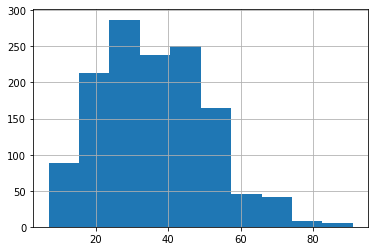

In [3]:
mal = ww_tobacco[ww_tobacco["Gender"]=="Male"].copy()
mal = mal.set_index(["Location", "Year"])
mal["Value"].hist()

<AxesSubplot:>

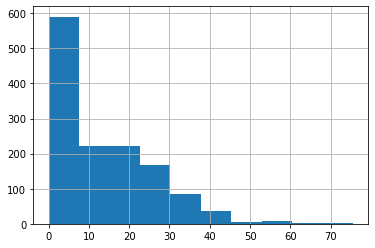

In [4]:
fem = ww_tobacco[ww_tobacco["Gender"]=="Female"].copy()
fem = fem.set_index(["Location", "Year"])
fem["Value"].hist()

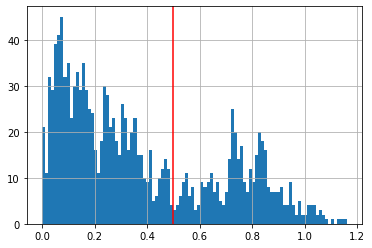

In [5]:
bi = fem["Value"] / mal["Value"]
bi.hist(bins = 100)
plt.axvline(x=.5, color ='red')
plt.show()

In [6]:
# looks like we can seperate the two groups at .5 as the ratio

In [7]:
bi

Location  Year
Albania   2000    0.193380
          2005    0.180832
          2010    0.171053
          2013    0.165385
          2014    0.164410
                    ...   
Zimbabwe  2014    0.057348
          2015    0.054545
          2016    0.051471
          2017    0.052045
          2018    0.049057
Name: Value, Length: 1341, dtype: float64

In [8]:
parent_dict = ww_tobacco.set_index("Location")["ParentLocation"].to_dict()
bi[bi>.5].reset_index()["Location"].replace(parent_dict).value_counts()

Europe                   276
Americas                  64
Western Pacific           45
Africa                    12
Eastern Mediterranean      9
South-East Asia            5
Name: Location, dtype: int64

In [9]:
bi[bi<.5].reset_index()["Location"].replace(parent_dict).value_counts()

Africa                   321
Western Pacific          153
Europe                   146
Eastern Mediterranean    117
Americas                 116
South-East Asia           76
Name: Location, dtype: int64

In [10]:
## NOTE: we can't use linear regression here since each year for a country is a seperate datapoint which would probably violate IID assumption

In [11]:
# https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2020&start=2020&view=map
# took the file out from zip and renamed it capita.csv

# per capita gdp in US dollars
gdp = pd.read_csv("capita.csv", skiprows=4)
gdp = gdp.drop(columns = "Unnamed: 65")
gdp = gdp.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name="Year", value_name="gdp")
gdp["Year"] = gdp["Year"].astype(int)
gdp = gdp.rename(columns = {"Country Name": "Location"}).set_index(["Location", "Year"])
gdp = gdp.join(bi, how = 'inner')
gdp = gdp.rename(columns = {'Value': 'ratio'})

# USE THIS CSV!
gdp.to_csv("gdp_ratio.csv")
gdp

,,Country Code,Indicator Name,Indicator Code,gdp,ratio
Location,Year,,,,,
Albania,2000,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1126.683318,0.193380
Andorra,2000,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21854.246803,0.701878
United Arab Emirates,2000,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,33291.366254,0.030733
Argentina,2000,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,7708.099115,0.728972
Armenia,2000,ARM,GDP per capita (current US$),NY.GDP.PCAP.CD,622.740923,0.039334
...,...,...,...,...,...,...
Vanuatu,2018,VUT,GDP per capita (current US$),NY.GDP.PCAP.CD,3125.404999,0.073333
Samoa,2018,WSM,GDP per capita (current US$),NY.GDP.PCAP.CD,4188.571058,0.414216
South Africa,2018,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,6372.605655,0.341880


In [12]:
gdp[gdp["ratio"]<.5]['gdp'].describe()

count      804.000000
mean      7602.383018
std      11822.983284
min        124.460791
25%       1155.342096
50%       3419.996959
75%       8090.100668
max      85050.684346
Name: gdp, dtype: float64

In [13]:
gdp[gdp["ratio"]>.5]['gdp'].describe()

count       365.000000
mean      29364.696116
std       24559.067985
min          99.744920
25%        9427.730430
50%       22364.029394
75%       44572.898754
max      118823.648369
Name: gdp, dtype: float64

In [14]:
# distributions are definetly different, though can't use a normal distribution (see below), may need a log transformation

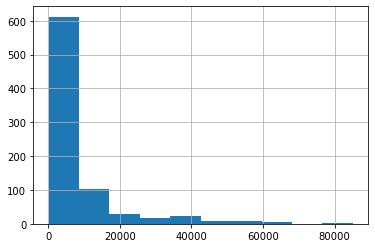

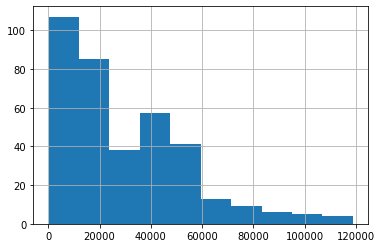

In [15]:
gdp[gdp["ratio"]<.5]['gdp'].hist()
plt.show()
gdp[gdp["ratio"]>.5]['gdp'].hist()
plt.show()

In [16]:
# looks somewhat better with log transform

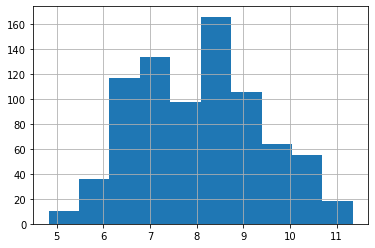

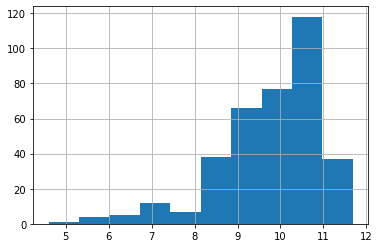

In [17]:
np.log(gdp[gdp["ratio"]<.5]['gdp']).hist()
plt.show()
np.log(gdp[gdp["ratio"]>.5]['gdp']).hist()
plt.show()

In [18]:
# let's see whether having a high female/make smoker ratio means less or more smoking

In [19]:
both = ww_tobacco[ww_tobacco["Gender"] == "Both sexes"].set_index(["Location", "Year"])
both["ratio"] = bi

# USE THIS CSV
both.to_csv("both_ratio.csv")
both

,,ParentLocationCode,ParentLocation,SpatialDimValueCode,Gender,Value,ratio
Location,Year,,,,,,
Eswatini,2018,AFR,Africa,SWZ,Both sexes,10.7,0.115183
Bahamas,2018,AMR,Americas,BHS,Both sexes,10.9,0.172043
Jamaica,2018,AMR,Americas,JAM,Both sexes,11.0,0.237288
Chad,2018,AFR,Africa,TCD,Both sexes,11.8,0.107981
Kenya,2018,AFR,Africa,KEN,Both sexes,11.8,0.134615
...,...,...,...,...,...,...,...
Kiribati,2000,WPR,Western Pacific,KIR,Both sexes,67.9,0.662179
Nigeria,2000,AFR,Africa,NGA,Both sexes,7.3,0.131783
Niger,2000,AFR,Africa,NER,Both sexes,7.9,0.161765


In [20]:
both[both['ratio']>.5]["Value"].describe()

count    411.000000
mean      31.304136
std       10.440769
min        9.400000
25%       24.400000
50%       29.500000
75%       36.300000
max       71.000000
Name: Value, dtype: float64

In [21]:
both[both['ratio']<.5]["Value"].describe()

count    929.000000
mean      21.928741
std       10.491698
min        3.700000
25%       13.600000
50%       21.500000
75%       28.700000
max       61.800000
Name: Value, dtype: float64

<AxesSubplot:>

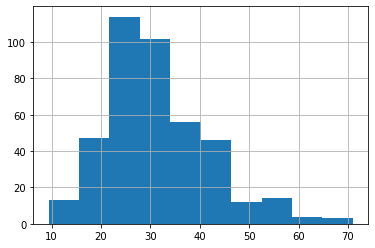

In [22]:
both[both['ratio']>.5]["Value"].hist()

<AxesSubplot:>

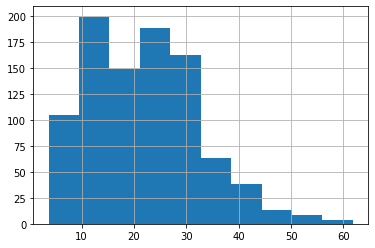

In [23]:
both[both['ratio']<.5]["Value"].hist()

In [24]:
both.reset_index()["Year"].value_counts()

2018    149
2017    149
2016    149
2015    149
2014    149
2013    149
2010    149
2005    149
2000    149
Name: Year, dtype: int64

In [25]:
bi

Location  Year
Albania   2000    0.193380
          2005    0.180832
          2010    0.171053
          2013    0.165385
          2014    0.164410
                    ...   
Zimbabwe  2014    0.057348
          2015    0.054545
          2016    0.051471
          2017    0.052045
          2018    0.049057
Name: Value, Length: 1341, dtype: float64

In [26]:
bi.reset_index()["Location"]

0        Albania
1        Albania
2        Albania
3        Albania
4        Albania
          ...   
1336    Zimbabwe
1337    Zimbabwe
1338    Zimbabwe
1339    Zimbabwe
1340    Zimbabwe
Name: Location, Length: 1341, dtype: object

In [27]:
# un gender inequality
# http://hdr.undp.org/en/indicators/68606#
gii = pd.read_csv('gii.csv', skiprows=5, encoding='latin-1')
gii = gii.drop(columns = gii.columns[gii.columns.str.contains("Unnamed")])
gii = gii.replace({"..": np.nan})
gii = gii[gii["HDI Rank"].str.isnumeric().fillna(False)].copy()
gii = gii.drop(columns = "HDI Rank")
gii = gii.melt(id_vars = ["Country"], var_name = "Year", value_name = "gii")
gii["Year"] = gii["Year"].astype(int)
gii["Country"] = gii["Country"].str.lstrip(' ')
gii["gii"] = gii["gii"].astype(float)

gii = gii.rename(columns = {"Country": "Location"}).set_index(["Location", "Year"])
gii = gii.join(bi, how = 'inner').dropna()
gii = gii.rename(columns = {"Value": 'ratio'})

# USE THIS CSV
gii.to_csv('gii_ratio.csv')
gii

,,gii,ratio
Location,Year,,
Albania,2000,0.334,0.193380
Algeria,2000,0.624,0.056604
Argentina,2000,0.417,0.728972
Armenia,2000,0.473,0.039334
Australia,2000,0.160,0.842809
...,...,...,...
Uruguay,2018,0.285,0.730159
Uzbekistan,2018,0.288,0.055794
Yemen,2018,0.811,0.286154


In [28]:
gii[gii['ratio']>.5]["gii"].describe()

count    337.000000
mean       0.177846
std        0.134282
min        0.039000
25%        0.084000
50%        0.134000
75%        0.217000
max        0.683000
Name: gii, dtype: float64

In [29]:
gii[gii['ratio']<.5]["gii"].describe()

count    744.000000
mean       0.440195
std        0.158815
min        0.066000
25%        0.318750
50%        0.452000
75%        0.559000
max        0.819000
Name: gii, dtype: float64

<AxesSubplot:>

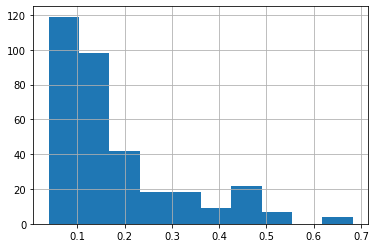

In [30]:
gii[gii['ratio']>.5]["gii"].hist()

<AxesSubplot:>

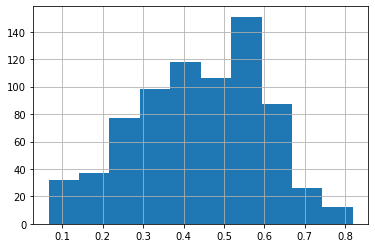

In [31]:
gii[gii['ratio']<.5]["gii"].hist()

In [32]:
# it almost looks like having more women smoke just increases the mean on the distribution (ie. women smoking doesn't seem to change male smoking??)
# HYPOTHESIS: more progressive countries (where women smoking is more accepted) just see an increase in women smoking
    # -- could we test this by taking a low ratio countries and simulate adding more women smokers?

In [33]:
# gender results so far:
# men smoke much more than women in the us (from Jun)
# COPD has much higher mortality in men than women (from Chloris)

# tentative results so far (could use some statistical tests or not):
# bimodal distribution of female/male smoker ratio
# the two clusters for the two modes in the distribution seem to be in different geographic locations (Europe has high ratios, Africa and West Pacific have low ratios)
# likewise richer countries (higher per capita gdp) seem to have higher ratios
# when the female/male smoker ratio is high, it doesn't seem to mean that less men are smoking, only that more women are smoking
# confirmed by UN gender inequality index, looks like high ratio countries have low inequality and vice versa 

# maybe we could try looking at change over time? -- as gdp/gii increased, did women smoking also increase? (when controlling for global decrease in smoking)

# we can focus on the narrative that "cultural acceptance" of women smoking leads to high rates of women smoking while leaving men unaffected
    # be very sure to clarify that this is NOT an argument against women's rights/equality 
    # maybe talk about how this could be a very serious problem for developing countries that are likely to decrease gender inequality (citation?)
        # -> could lead to more women smoking which would require forward action
